## **Credit Scoring Classification Model**

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# to perform statistical test
from sklearn.feature_selection import chi2 # for categorical fetures
from sklearn.feature_selection import f_classif # for numerical features (Anova f-test)

# impot pipeline
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv("/Credit_Score_Clean.csv")

In [3]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


In [5]:
print(f'Data Set has {df.shape[0]} rows and {df.shape[1]} columns')

Data Set has 31711 rows and 21 columns


In [7]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
print(f'There are {len(numerical_features)} numerical features: {numerical_features}')

There are 16 numerical features: ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']


In [9]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
print(f'There are {len(categorical_features)} categorical features: {categorical_features}')

There are 5 categorical features: ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31711 entries, 0 to 31710
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        31711 non-null  int64  
 1   Occupation                 31711 non-null  object 
 2   Annual_Income              31711 non-null  float64
 3   Num_Bank_Accounts          31711 non-null  int64  
 4   Num_Credit_Card            31711 non-null  int64  
 5   Interest_Rate              31711 non-null  int64  
 6   Num_of_Loan                31711 non-null  int64  
 7   Delay_from_due_date        31711 non-null  int64  
 8   Num_of_Delayed_Payment     31711 non-null  int64  
 9   Changed_Credit_Limit       31711 non-null  float64
 10  Num_Credit_Inquiries       31711 non-null  float64
 11  Credit_Mix                 31711 non-null  object 
 12  Outstanding_Debt           31711 non-null  float64
 13  Credit_Utilization_Ratio   31711 non-null  flo

In [13]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
count,31711.000000,3.171100e+04,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000,31711.000000
mean,35.135032,1.749045e+05,4.415818,4.801583,10.256504,2.234114,14.985967,26.493299,8.601820,3.903030,776.983756,32.522218,59.287714,181.502288,439.647331,243.861026
std,11.037186,1.415577e+06,2.305062,1.673844,5.916633,1.700965,9.353937,215.388313,5.119076,2.813889,443.968460,5.135545,53.461204,196.253121,225.424866,108.853693
min,14.000000,7.006520e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.832487,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2.211810e+04,3.000000,4.000000,6.000000,1.000000,8.000000,6.000000,4.550000,2.000000,388.920000,28.299138,16.414812,61.938256,293.841559,195.000000
50%,35.000000,3.699394e+04,4.000000,5.000000,9.000000,2.000000,13.000000,11.000000,8.370000,4.000000,780.210000,32.501616,46.162077,121.191802,369.698223,256.000000
75%,44.000000,7.452061e+04,6.000000,6.000000,14.000000,3.000000,22.000000,15.000000,11.620000,6.000000,1182.500000,36.731398,89.163419,225.891543,523.103061,329.000000
max,56.000000,2.419806e+07,10.000000,10.000000,34.000000,9.000000,60.000000,4397.000000,26.900000,12.000000,1499.920000,49.564519,199.904691,1903.080048,1602.040519,404.000000


In [12]:
df.isnull().sum()

,0
Age,0
Occupation,0
Annual_Income,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


In [15]:
df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Entrepreneur', 'Developer', 'Lawyer',
       'Journalist', 'Engineer', 'Accountant', 'Musician', 'Architect',
       'Writer', 'Manager', 'Media_Manager', 'Doctor', 'Mechanic'],
      dtype=object)

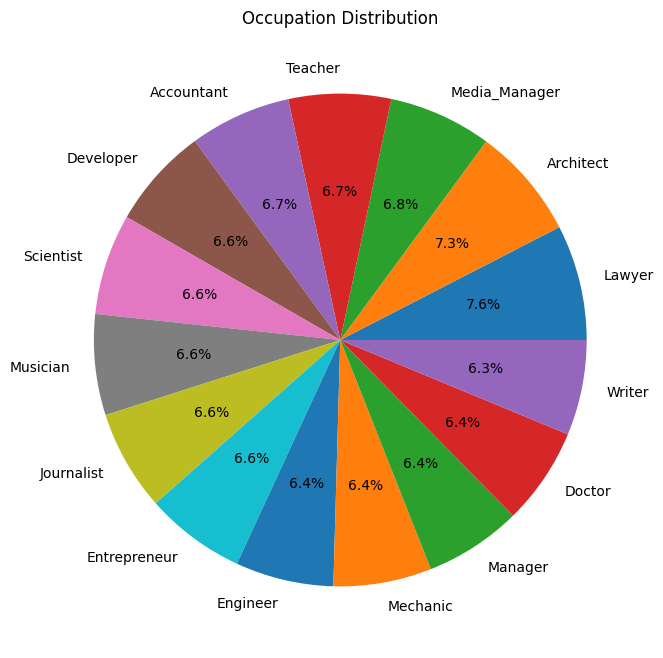

In [16]:
occupation_counts = df['Occupation'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%')
plt.title("Occupation Distribution")
plt.show()

In [17]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [18]:
df['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Large_value_payments',
       'High_spent_Small_value_payments'], dtype=object)

In [19]:
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [20]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

# **Feature Engineering**


In [21]:
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 1 if x in ['Good', 'Standard'] else 0)
print(df['Credit_Score'].value_counts())

Credit_Score
1    27281
0     4430
Name: count, dtype: int64


In [23]:
df.sample(9)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
21920,23,Architect,2.189751e+04,1,1,1,1,15,7,9.83,...,Good,630.68,38.231468,No,15.487464,139.898165,Low_spent_Large_value_payments,313.293580,1,340
30074,25,Teacher,1.605070e+07,7,4,18,6,5,17,18.20,...,Standard,1443.38,24.451808,Yes,79.651607,119.655020,Low_spent_Small_value_payments,253.193373,1,215
30702,30,Architect,6.999997e+06,3,4,11,1,10,4,1.78,...,Good,1078.62,34.062786,No,82.440794,323.307331,High_spent_Medium_value_payments,927.697875,1,253
16470,40,Writer,3.172938e+04,2,5,3,4,6,0,8.24,...,Good,1221.11,33.293937,No,95.758528,0.000000,Low_spent_Small_value_payments,349.745090,0,236
1839,35,Lawyer,1.887320e+04,3,1,4,4,9,12,4.39,...,Good,1170.52,31.185743,No,32.027620,0.000000,Low_spent_Small_value_payments,236.637966,1,243
9528,32,Lawyer,5.068632e+04,5,4,19,2,30,13,14.01,...,Standard,145.46,38.164445,Yes,61.686737,302.337870,Low_spent_Large_value_payments,351.161393,1,115
8033,35,Journalist,2.168746e+04,1,1,12,4,1,5,6.39,...,Good,1370.17,26.869078,No,56.529937,208.630071,Low_spent_Small_value_payments,225.168825,1,255
7107,25,Scientist,2.023580e+04,8,7,7,2,20,15,4.74,...,Standard,856.73,36.430163,No,28.317033,59.834622,High_spent_Medium_value_payments,331.780012,1,225
2911,41,Musician,3.397857e+04,5,5,6,3,35,12,15.98,...,Standard,1082.25,36.029209,NM,60.068643,360.953184,Low_spent_Small_value_payments,137.532923,1,188


---

### **Statistical Test**

---

In [24]:
# Chi-Squared Test
label_enc = LabelEncoder()
for col in categorical_features:
    df[col] = label_enc.fit_transform(df[col])

In [30]:
x1 = df[['Occupation','Credit_Mix', 'Payment_Behaviour' , 'Payment_of_Min_Amount']]
y1 = df['Credit_Score']

In [31]:
chi_scores = chi2(x1, y1)
chi2_scores = pd.DataFrame({"Feature": x1.columns, "Score": chi_scores[0]})
print(chi2_scores.sort_values(by="Score", ascending=False))

                 Feature       Score
1             Credit_Mix  288.745515
2      Payment_Behaviour  127.452384
0             Occupation    4.753546
3  Payment_of_Min_Amount    0.001643


In [32]:
# f_test
X_test = df[['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']]
y_test = df['Credit_Score']

In [33]:
f_scores, p_values = f_classif(X_test, y_test)

In [35]:
f_scores_df = pd.DataFrame({'Feature': X_test.columns, 'F-Score': f_scores})
print(f_scores_df.sort_values(by='F-Score', ascending=False))

                      Feature      F-Score
6         Delay_from_due_date  1290.385124
3             Num_Credit_Card  1030.110256
9        Num_Credit_Inquiries   585.906436
4               Interest_Rate   453.047239
10           Outstanding_Debt   451.549924
5                 Num_of_Loan   274.356620
15  Credit_History_Age_Months    92.515418
12        Total_EMI_per_month    28.425328
8        Changed_Credit_Limit    27.130593
13    Amount_invested_monthly    20.350875
0                         Age    11.370137
2           Num_Bank_Accounts     6.047901
11   Credit_Utilization_Ratio     2.873588
7      Num_of_Delayed_Payment     2.290066
1               Annual_Income     0.064910
14            Monthly_Balance     0.030461


In [50]:
# List of selected features (from the above chi-squared and F-test results)
selected_features = [
    'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
    'Delay_from_due_date', 'Interest_Rate', 'Num_Credit_Card',
    'Num_Bank_Accounts', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Num_of_Loan', 'Outstanding_Debt', 'Occupation'
]

-----
# **Model Training**
----

In [51]:
X = df[selected_features]
y = df['Credit_Score']  # 'loan_eligibility' is the target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test_scaled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.9124490518834942
Test Accuracy: 0.9132902412107835

Model: Gradient Boosting
Cross-validation Accuracy: 0.8893094676609946
Test Accuracy: 0.8948447107047138

Model: Support Vector Machine
Cross-validation Accuracy: 0.8595474693829569
Test Accuracy: 0.8918492826738137

Model: Logistic Regression
Cross-validation Accuracy: 0.8734233443595792
Test Accuracy: 0.8795522623364339

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.8879298621676538
Test Accuracy: 0.8909033580324768

Model: Decision Tree
Cross-validation Accuracy: 0.8696783601126354
Test Accuracy: 0.8749802932366388

Model: Ada Boost
Cross-validation Accuracy: 0.8755913913077192
Test Accuracy: 0.8801828787639918

Model: XG Boost
Cross-validation Accuracy: 0.9014901709771277
Test Accuracy: 0.9033580324767461

Model: Naive Bayes
Cross-validation Accuracy: 0.8749211686748326
Test Accuracy: 0.8781333753744285

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_

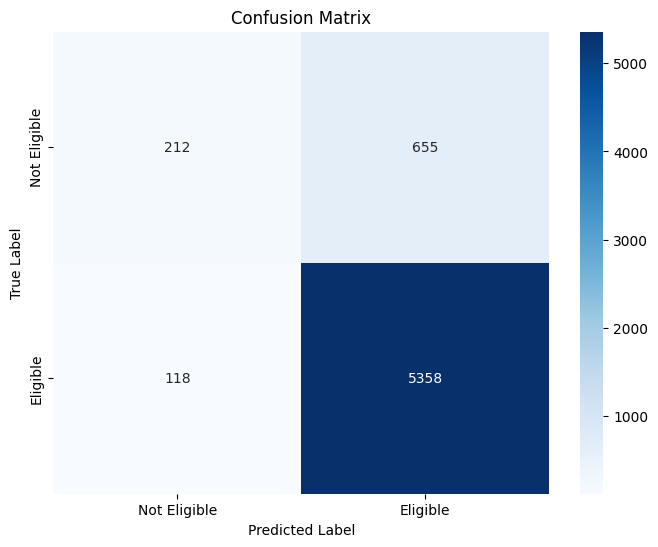

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_pred' contains the predictions from your best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Eligible', 'Eligible'],
            yticklabels=['Not Eligible', 'Eligible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#  **The model is very good at predicting the eligible values but has a problem with not eligible ones that can be due to the inbalance of the data so we will balance the data then train and evaluate the model.**



In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

# 3) HANDLE CLASS IMBALANCE WITH SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Class counts before SMOTE:", np.bincount(y_train))
print("Class counts after  SMOTE:", np.bincount(y_train_bal))

# 4) TRAIN RANDOM FOREST
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',  # make model care more about minority class
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_bal, y_train_bal)

# 5) EVALUATE ON ORIGINAL TEST SET
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))



Class counts before SMOTE: [ 3544 21824]
Class counts after  SMOTE: [21824 21824]
Confusion Matrix:
 [[ 563  323]
 [ 272 5185]]

Classification Report:

              precision    recall  f1-score   support

           0     0.6743    0.6354    0.6543       886
           1     0.9414    0.9502    0.9457      5457

    accuracy                         0.9062      6343
   macro avg     0.8078    0.7928    0.8000      6343
weighted avg     0.9040    0.9062    0.9050      6343



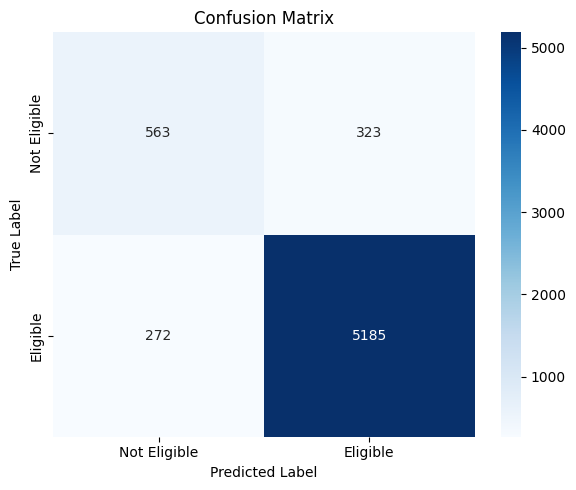

In [59]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Eligible", "Eligible"],
    yticklabels=["Not Eligible", "Eligible"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [61]:
import pickle
filename = 'credit_score_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [76]:
# Sample data for prediction where the model predicts the user should be given a loan
sample_data = pd.DataFrame({
    'Credit_Mix': [0],
    'Payment_of_Min_Amount': [1],
    'Payment_Behaviour': [0],
    'Delay_from_due_date': [30],
    'Interest_Rate': [35],
    'Num_Credit_Card': [8],
    'Num_Bank_Accounts': [4],
    'Changed_Credit_Limit': [12.62],
    'Num_Credit_Inquiries': [12],
    'Num_of_Loan': [7],
    'Outstanding_Debt': [1093.87],
    'Occupation': [2]
})

# Load the saved model
loaded_model = pickle.load(open(filename, 'rb'))

# Make prediction
prediction = loaded_model.predict(sample_data)

if prediction[0] == 1:
  print("User should be given a loan.")
else:
  print("User should not be given a loan.")

User should not be given a loan.
